# Vehicle detection project

## Step 1: Create data pipeline

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    car_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = car_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = car_img.dtype
    # Return data_dict
    return data_dict

In [3]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    "Shows input images by stacking them in num_cols columns"
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)

    plt.show()

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


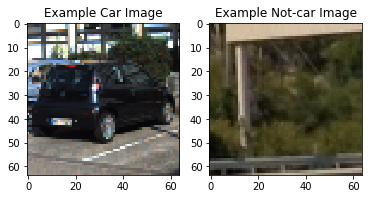

In [19]:
import glob

#Read cars and not-cars images

#Data folders
vehicles_dir =     '../data/vehicles/'
non_vehicles_dir = '../data/non-vehicles/'

cars = []
notcars = []
# car_images_dirs = ['vehicles/GTI_FAR', 'vehicles/GTI_Left', 'vehicles/GTI_MiddleClose',
#                    'vehicles/GTI_Right', 'vehicles/KITTI_extracted']
# notcar_images_dirs = ['non-vehicles/Extras', 'non-vehicles/GTI']

# images are divided up into vehicles and non-vehicles

# Read vehicle images
images = glob.iglob(vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        cars.append(image)
        
# Read non-vehicle images
images = glob.iglob(non_vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        notcars.append(image)
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Car images


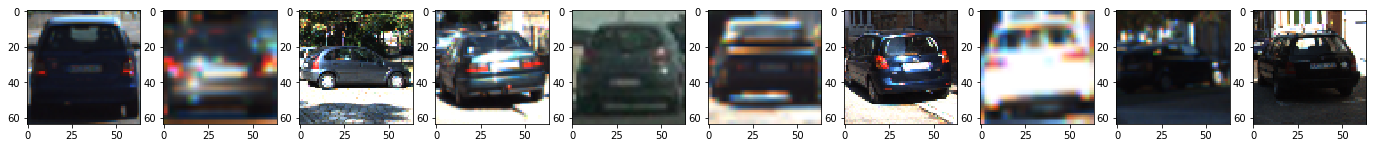

Not-car images


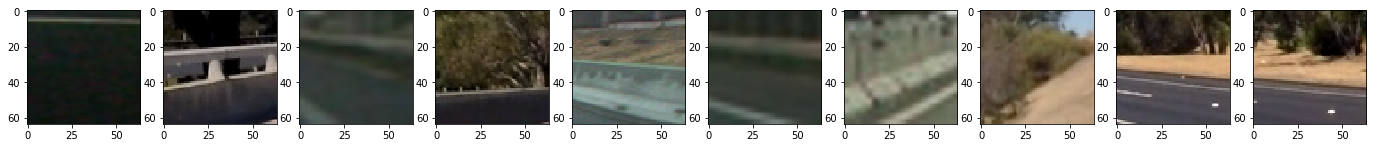

In [27]:
#Visualize some input images
import random

num_images = 10

# Just for fun choose random car / not-car indices and plot example images   
cars_samples = random.sample(list(cars), num_images)
notcar_samples = random.sample(list(notcars), num_images)
    
# Read in car / not-car images
car_images = []
notcar_images = []
for sample in cars_samples:
    car_images.append(mpimg.imread(sample))
    
for sample in notcar_samples:
    notcar_images.append(mpimg.imread(sample))

visualize_images(car_images, num_images, "Example Car images")
visualize_images(notcar_images, num_images, "Example not-car images")
# # Plot the examples
# fig = plt.figure()
# plt.subplot(121)
# plt.imshow(car_image)
# plt.title('Example Car Image')
# plt.subplot(122)
# plt.imshow(notcar_image)
# plt.title('Example Not-car Image')